# LangChain basic - component I.
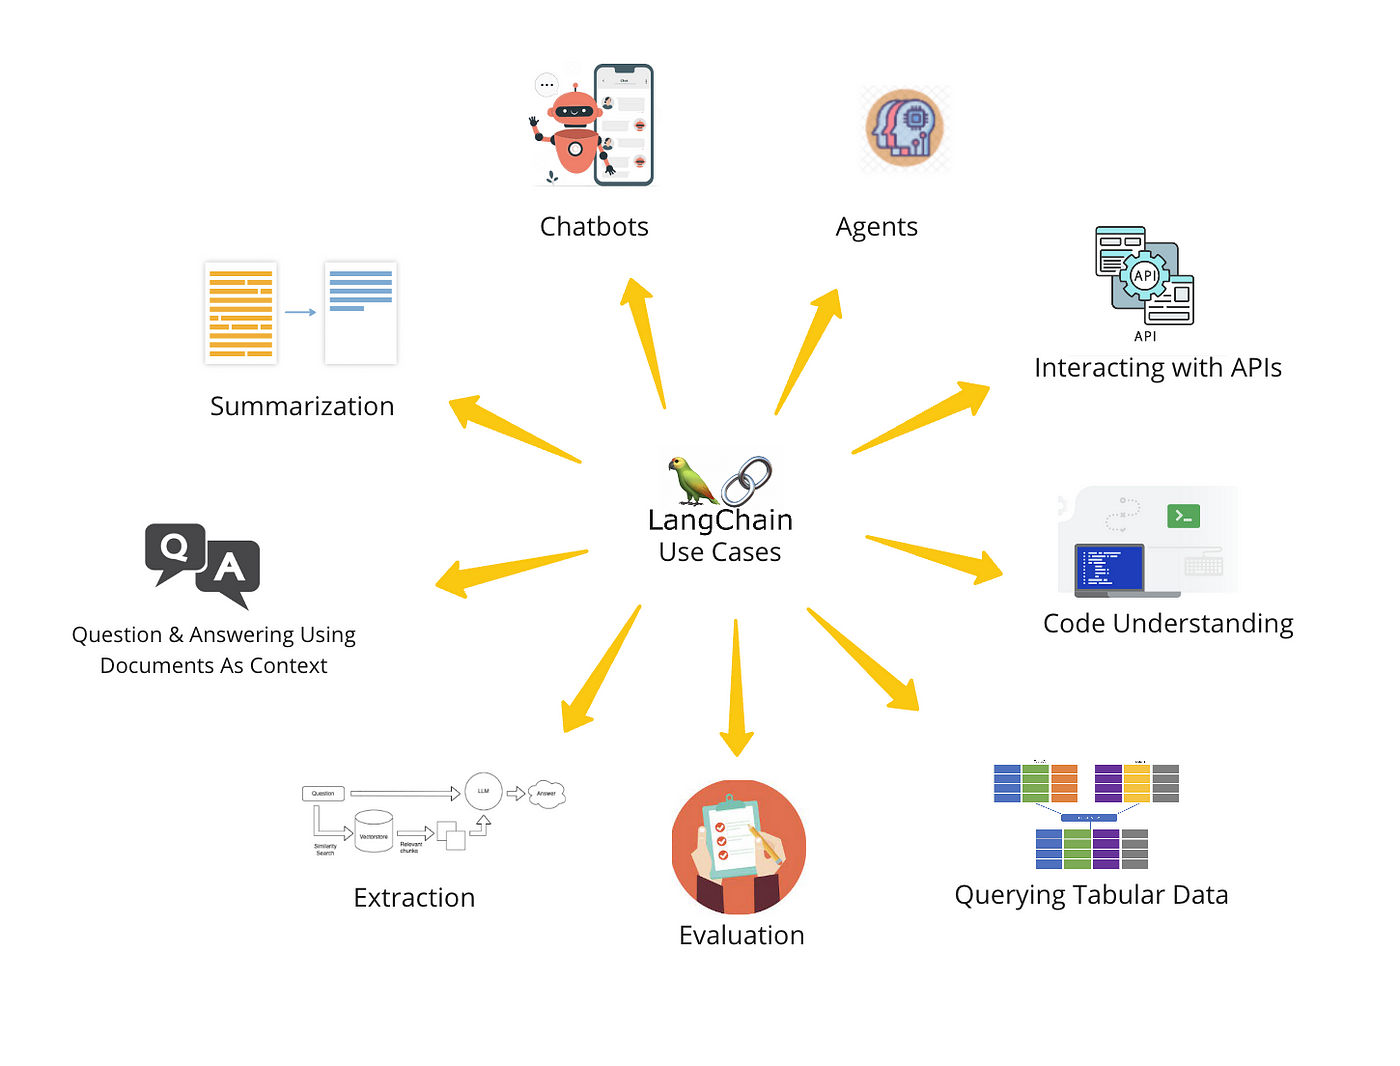
## LLMs, Prompt Templates, Caching, Streaming, Chains

This notebook uses the latest versions of the OpenAI and LangChain libraries.

In [1]:
!pip install -r ./requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.5 requires pandas<2.0,>=1.1, but you have pandas 2.1.2 which is incompatible.
dataprep 0.4.5 requires regex<2022.0.0,>=2021.8.3, but you have regex 2023.12.25 which is incompatible.
dataprep 0.4.5 requires sqlalchemy==1.3.24, but you have sqlalchemy 2.0.22 which is incompatible.
shioaji 1.1.0 requires filelock==3.4.1, but you have filelock 3.12.0 which is incompatible.
ydata-profiling 4.5.1 requires pandas!=1.4.0,<2.1,>1.1, but you have pandas 2.1.2 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Download [requirements.txt](https://drive.google.com/file/d/1UpURYL9kqjXfe9J8o-_Dq5KJTbQpzMef/view?usp=sharing)

In [2]:
!pip install --upgrade -q langchain


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install --upgrade -q openai


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip show openai

Name: openai
Version: 1.12.0
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: c:\users\xdxd2\appdata\roaming\python\python310\site-packages
Requires: anyio, distro, httpx, pydantic, sniffio, tqdm, typing-extensions
Required-by: langchain-openai, llama-index
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show langchain

Name: langchain
Version: 0.1.6
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: c:\users\xdxd2\appdata\roaming\python\python310\site-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: jupyter_ai_magics, langchain-experimental, llama-index
Note: you may need to restart the kernel to use updated packages.


### Python-dotenv

In [4]:
import os
from dotenv import load_dotenv, find_dotenv

# loading the API Keys from .env
load_dotenv(find_dotenv(), override=True)

# os.environ.get('OPENAI_API_KEY')

True

## Chat Models: GPT-3.5 Turbo and GPT-4

In [5]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()  

# invoking the llm (running the prompt)
'''
model（模型）: 指定生成回應所使用的模型，例如 'gpt-3.5-turbo' or 'gpt-4'，這是決定語言模型功能和效能的關鍵因素。
temperature（溫度）: 控制輸出的隨機性，影響生成文本的創造性和多樣性。較低的溫度使得模型回應更為確定和保守，較高的溫度則鼓勵模型產生更多元和創新的內容。
max_tokens（最大令牌數）: 定義生成回應的最大長度，以令牌（token）計算。這個參數能夠限制回應的詳細程度和範圍。
'''
# output = llm.invoke('Explain quantum mechanics in one sentence.', model='gpt-3.5-turbo', temperature=0.1)
output = llm.invoke('Explain quantum mechanics in one sentence.', model='gpt-4-0613', temperature=0.1)
print(output.content)



Quantum mechanics is a branch of physics that deals with phenomena on a very small scale, such as molecules, atoms, and subatomic particles, where particles can exist in multiple states at once and are affected by observation.


In [ ]:
help(ChatOpenAI)  # see the llm constructor arguments with its defaults

# name: An optional string to name the instance. Useful for identifying or logging purposes.
# cache: An optional boolean to enable or disable caching of responses. If enabled, repeated prompts might return cached responses for efficiency.
# verbose: A boolean flag that, when set to True, enables more detailed logs or outputs for debugging or informational purposes.
# callbacks: A list of callback handlers or a callback manager. These are used for event-driven programming, allowing you to execute custom code at certain points in the request/response lifecycle.
# callback_manager: An optional instance of a BaseCallbackManager that manages the lifecycle and invocation of callback handlers.
# tags: An optional list of strings that can be used for tagging or categorizing instances for organizational purposes.
# metadata: An optional dictionary of arbitrary key-value pairs that you can attach to the instance for custom metadata.
# client, async_client: Clients used for making synchronous or asynchronous HTTP requests to the OpenAI API.
# model: The default model to use for generating responses, such as 'gpt-3.5-turbo'.(重要)
# temperature: The default randomness parameter for the model's responses, affecting creativity and determinism. (重要)
# model_kwargs: A dictionary of additional keyword arguments to pass to the model. These could include any of the model-specific parameters like max_tokens, frequency_penalty, etc.
# api_key: An optional string for the OpenAI API key, required for authenticating requests.
# base_url: The base URL for the OpenAI API, which could be customized for different environments or proxies.
# organization: An optional string specifying the OpenAI organization under which the requests should be made.
# openai_proxy: An optional proxy URL for the OpenAI API requests.
# timeout: Configures the timeout for HTTP requests. This can be a single float or a tuple of floats specifying the connect and read timeouts.
# max_retries: The number of times a failed request should be retried before giving up.(重要)
# streaming: A boolean flag indicating whether responses should be streamed. Useful for large responses or real-time interaction.
# n: The number of responses to generate for each prompt. Useful for generating multiple outputs for comparison.(重要)
# max_tokens: The default maximum number of tokens to generate in the response. This limits the length of the output.(重要)
# tiktoken_model_name: An optional parameter for specifying a model name when using TikToken for authentication or request routing.
# default_headers, default_query: Optional mappings for specifying default HTTP headers and query parameters for requests.
# http_client: An optional parameter to specify a custom HTTP client for making requests.



In [6]:
# using Chat Completions API Messages: System, Assistant and Human
from langchain.schema import(
    SystemMessage, 
    AIMessage,
    HumanMessage
)
messages = [
    SystemMessage(content='You are a physicist and respond only in chinese.'),
    HumanMessage(content='Explain quantum mechanics in one sentence.')
]


output = llm.invoke(messages, model='gpt-4-0613', temperature=0.6)
print(output.content)



量子力学是研究物质和光在微观尺度上的行为的物理学分支。


## Caching LLM Responses

Caching is the practice of storing frequently accessed data or result in a temporary faster storage layer.<br>
Caching optimize interactions with LLMs by reducing API calls and speeding up applications. resulting in a more efficient user experience.

### 1. In-Memory Cache

In [8]:
from langchain.globals import set_llm_cache
from langchain.cache import InMemoryCache
from langchain_openai import OpenAI

llm = OpenAI(model_name='gpt-3.5-turbo-instruct')

In [32]:
%%time
set_llm_cache(InMemoryCache())
prompt = '獵人何時完結?'
llm.invoke(prompt)

CPU times: total: 46.9 ms
Wall time: 1.5 s


'\n\n目前尚無確定的完結日期，原作漫畫作者富樫雅廣曾表示希望在2020年完成，但因為多次休刊和延期，目前仍無法確定。另外，動畫和電視劇版的製作也可能會影響故事進程和完結時間。'

In [36]:
%%time

llm.invoke(prompt)


CPU times: total: 0 ns
Wall time: 282 µs


'\n\n目前尚無確定的完結日期，原作漫畫作者富樫雅廣曾表示希望在2020年完成，但因為多次休刊和延期，目前仍無法確定。另外，動畫和電視劇版的製作也可能會影響故事進程和完結時間。'

### 2. SQLite Caching

In [16]:
from langchain.cache import SQLiteCache
set_llm_cache(SQLiteCache(database_path=".langchain.db"))

In [17]:
%%time
# First request (not in cache, takes longer)
llm.invoke("Tell me a joke")

CPU times: total: 15.6 ms
Wall time: 696 ms


"\n\nWhy couldn't the bicycle stand up by itself? Because it was two-tired!"

In [18]:
%%time
# Second request (cached, faster)
llm.invoke("Tell me a joke")

CPU times: total: 438 ms
Wall time: 630 ms


"\n\nWhy couldn't the bicycle stand up by itself? Because it was two-tired!"

## LLM Streaming

Streaming refer to the process of delivering the response in a continuous stream of data instead of sending the entire response at once <br>
This allows the user to receive the response piece by place as it is generated, which can improve the user experience and reduce the overall latency.

In [40]:
from langchain_openai import ChatOpenAI

set_llm_cache(InMemoryCache())
llm = ChatOpenAI(model='gpt-4-0613', temperature=0.4)
prompt = '以 "超派雞排" 和 "超派鐵拳" 寫一首抒情歌'
print(llm.invoke(prompt).content)


(Verse 1)
在這城市的熙來攘往，尋找一份獨特的滋味，
超派雞排在手，咬一口，心情瞬間飛揚起來，
那酥脆的外皮，嫩滑的雞肉，讓人忍不住再嚐一口，
就像愛情的甜蜜，讓人沉醉，忘記了所有的煩惱。

(Chorus)
超派雞排，超派鐵拳，我們的愛情就像這樣，
無論是甜蜜或苦澀，我們都會一起面對，
超派雞排，超派鐵拳，我們的愛情就像這樣，
無論風雨或晴天，我們都會一起走過。

(Verse 2)
在這城市的喧囂中，尋找一份屬於我們的寧靜，
超派鐵拳在手，握一握，心情瞬間堅定起來，
那堅韌的外殼，柔軟的內心，讓人忍不住再握一次，
就像愛情的堅定，讓人安心，忘記了所有的困擾。

(Chorus)
超派雞排，超派鐵拳，我們的愛情就像這樣，
無論是甜蜜或苦澀，我們都會一起面對，
超派雞排，超派鐵拳，我們的愛情就像這樣，
無論風雨或晴天，我們都會一起走過。

(Outro)
超派雞排，超派鐵拳，這就是我們的愛情，
就像這城市的熙來攘往，有你在，一切都變得美好。


In [71]:
for chunk in llm.stream(prompt):
    print(chunk.content, end='', flush=True)

# ps: 注意 InMemoryCache() 沒有起作用，下面為改寫範例

一天，一隻兔子走進了一家理髮店，問理髮師：“你們有胡蘿蔔嗎？”理髮師回答：“這裡是理髮店，我們不賣胡蘿蔔。”第二天，兔子又來了，又問：“你們有胡蘿蔔嗎？”理髮師有點不耐煩：“我昨天就告訴你了，這裡是理髮店，我們不賣胡蘿蔔。”第三天，兔子還是來了，還是問：“你們有胡蘿蔔嗎？”理髮師生氣了：“我已經告訴你很多次了，這裡是理髮店，我們不賣胡蘿蔔！如果你再來問，我就用釘書機把你的耳朵釘在牆上！”第四天，兔子又來了，它問：“你們有釘書機嗎？”理髮師回答：“沒有。”兔子說：“那你們有胡蘿蔔嗎？”

### 整合文本相似度 搭配 streaming + caching technique，減少 call API 的開銷 

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from langchain_openai import ChatOpenAI
from langchain.cache import InMemoryCache
import hashlib
import json
import numpy as np
import random

class CachedChatOpenAI:
    def __init__(self, model, temperature=0.4, cache_file='chat_cache.json'):
        self.llm = ChatOpenAI(model=model, temperature=temperature)
        self.cache_file = cache_file
        self.cache = self.load_cache()
        self.vectorizer = TfidfVectorizer()  # 初始化TF-IDF向量化器

    def load_cache(self):
        # 从文件加载缓存
        if os.path.exists(self.cache_file):
            with open(self.cache_file, 'r', encoding='utf-8') as file:
                return json.load(file)
        return {}

    def save_cache(self):
        # 将缓存保存到文件，确保中文被正确写入
        with open(self.cache_file, 'w', encoding='utf-8') as file:
            json.dump(self.cache, file, ensure_ascii=False)

    def update_vectorizer(self):
        # 用当前缓存的prompts更新TF-IDF向量化器
        if self.cache:
            self.vectorizer.fit(self.cache.keys())
    
    def fuzzy_match_keys(self, prompt):
        # 用TF-IDF和余弦相似度实现模糊匹配
        if not self.cache:  # 如果缓存为空，则直接返回空列表
            return []
        self.update_vectorizer()  # 更新TF-IDF向量化器
        prompt_vec = self.vectorizer.transform([prompt])
        cache_vecs = self.vectorizer.transform(self.cache.keys())
        cosine_sim = cosine_similarity(prompt_vec, cache_vecs)
        
        if np.max(cosine_sim) > 0.6:  # 设置一个阈值，比如0.6
            most_similar_index = np.argmax(cosine_sim)
            return [list(self.cache.keys())[most_similar_index]]
        else:
            return []

    def stream(self, prompt):
        # 修改stream方法以保存更新后的缓存
        matched_keys = self.fuzzy_match_keys(prompt)
        if matched_keys:
            random_key = random.choice(matched_keys)
            cached_result = self.cache[random_key]
            for chunk in cached_result:
                print(chunk, end='', flush=True)
        else:
            result_chunks = []
            for chunk in self.llm.stream(prompt):
                print(chunk.content, end='', flush=True)
                result_chunks.append(chunk.content)
            self.cache[prompt] = result_chunks
            self.save_cache()  # 更新缓存后保存


if __name__ == "__main__":
    
    cached_llm = CachedChatOpenAI(model='gpt-4-0613', temperature=0.4)
    prompt = '以 "超派雞排" 和 "超派鐵拳" 寫一首抒情歌'

    cached_llm.stream(prompt)




(Verse 1)
在繁華的街頭，我尋找那份滋味，
超派雞排的香氣，引領我走向你。
你的笑容如陽光，照亮我孤單的夜，
我們的故事，就在這裡開始。

(Chorus)
超派雞排，你的味道我無法忘懷，
就像你的愛，深深烙印在我心間。
超派鐵拳，你的力量讓我驚嘆，
你的堅定，就像你的鐵拳，永不退縮。

(Verse 2)
我們在夜晚的街頭，分享著那份美味，
你的笑容在燈光下，如此動人。
超派鐵拳的力量，就像你的堅定，
讓我知道，有你在我身邊。

(Chorus)
超派雞排，你的味道我無法忘懷，
就像你的愛，深深烙印在我心間。
超派鐵拳，你的力量讓我驚嘆，
你的堅定，就像你的鐵拳，永不退縮。

(Bridge)
我們的愛情，就像超派雞排的味道，
深深吸引著我，讓我無法忘懷。
你的堅定，就像超派鐵拳的力量，
讓我知道，你會永遠守護我。

(Chorus)
超派雞排，你的味道我無法忘懷，
就像你的愛，深深烙印在我心間。
超派鐵拳，你的力量讓我驚嘆，
你的堅定，就像你的鐵拳，永不退縮。

(Outro)
在這繁華的街頭，我們的愛情綻放，
超派雞排的味道，超派鐵拳的力量，
都是你，我愛你，超派的愛情。

## Templates

A prompt refers to the input to the model<br>
Prompt template are a way to create dynamic prompt for LLMs<br>
A prompt template takes a piece of text and injects a user's input into that piece of text.<br>
in langchain there are "promptTemplate" and "chatPromptTemplates"<br>

## PromptTemplates

In [11]:
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

# Define a template for the prompt
template = '''
你現在是位社會學家，針對 {topic} 的議題，
請用申論架構搭配白話的方式解釋給一般社會大眾，
並提供中文和 {language} 的對照版本，文長限制 {token} 字。
'''

# Create a PromptTemplate object from the template
prompt_template = PromptTemplate.from_template(template=template)

# Fill in the variable: virus and language
prompt = prompt_template.format(topic='兩性平權', language='日文', token="100")
prompt  # Returns the generated prompt


'\n你現在是位社會學家，針對 兩性平權 的議題，\n請用申論架構搭配白話的方式解釋給一般社會大眾，\n並提供中文和 日文 的對照版本，文長限制 100 字。\n'

In [12]:
llm = ChatOpenAI(model_name='gpt-4-0613', temperature=0.6)
for chunk in llm.stream(prompt):
    print(chunk.content, end='', flush=True)


中文版本：
兩性平權是指男性和女性享有相同的權利和機會，無論在教育、工作還是家庭中。不同性別的人應該被平等對待，不應受到性別歧視的影響。我們應該推動性別平等，讓每個人都能擁有公平的待遇。

日文版本：
男女平等は、男性と女性が教育、仕事、家庭などで同等の権利と機会を持つことを意味します。性別に関わらず、すべての人が平等に扱われ、性別差別の影響を受けないようにすべきです。私たちは、すべての人が公平な待遇を受けることができるように、性別平等を推進すべきです。

## ChatPromptTemplates

In [15]:
# from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate

from langchain_core.prompts.chat import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain_core.messages import SystemMessage

# Create a chat template with system and human messages
chat_template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(content='You respond only in the JSON format.'), # 理解成系統 config 
        HumanMessagePromptTemplate.from_template('Top {n} countries in {area} by population.') # 根據 use case 動態填入
    ]
)

# Fill in the specific values for n and area
messages = chat_template.format_messages(n='5', area='World')
print(messages)  # Outputs the formatted chat messages



[SystemMessage(content='You respond only in the JSON format.'), HumanMessage(content='Top 5 countries in World by population.')]


In [17]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model_name='gpt-4-0613', temperature=0.6)
output = llm.invoke(messages)
print(output.content)

{
  "data": [
    {
      "country": "China",
      "population": 1439323776
    },
    {
      "country": "India",
      "population": 1380004385
    },
    {
      "country": "United States",
      "population": 331002651
    },
    {
      "country": "Indonesia",
      "population": 273523615
    },
    {
      "country": "Pakistan",
      "population": 220892340
    }
  ]
}


### summary


with prompt template，there are three features include reusability, scalability, and accuracy.

## Simple Chains

Chain are a series of steps and actions.

Chains allow us to combine multiple components together to solve a specific task and build an entire LLM application.

這種寫法比較好，較類似物件宣告的方式，可以將元件乾淨的切分開


In [19]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

llm = ChatOpenAI(model_name='gpt-4-0613', temperature=0.6)
template = '''
你現在是位社會學家，針對 {topic} 的議題，
請用申論架構搭配白話的方式解釋給一般社會大眾，文長限制 {token} 字。'''


prompt_template = PromptTemplate.from_template(template=template)

chain = LLMChain(
    llm=llm,
    prompt=prompt_template,
    verbose=True
)

output = chain.invoke({'topic': '少子化', 'token': '100'})






> Entering new LLMChain chain...
Prompt after formatting:

你現在是位社會學家，針對 少子化 的議題，
請用申論架構搭配白話的方式解釋給一般社會大眾，文長限制 100 字。

> Finished chain.


In [22]:
print(output)


{'topic': '少子化', 'token': '100', 'text': '少子化是指生育率持續下降，新一代人口數量少於前一代，造成人口結構老化。社會學觀點，這是因為現代人對於生活品質追求提高，工作壓力加大，以及教育、養育成本增加等因素，導致人們選擇晚婚或不生子。這將帶來社會老年人口增加，勞動力短缺等問題。'}


### 改寫動態輸入參數

In [23]:
llm = ChatOpenAI(model_name='gpt-4-0613', temperature=0.6)
template = 'What is the capital of {country}?. List the top 3 places to visit in that city. Use bullet points with chinese language'
prompt_template = PromptTemplate.from_template(template=template)

# Initialize an LLMChain with the ChatOpenAI model and the prompt template
chain = LLMChain(
    llm=llm,
    prompt=prompt_template,
    verbose=True
)

country = input('Enter Country: ')

# Invoke the chain with specific virus and language values
output = chain.invoke(country)
print(output['text'])





> Entering new LLMChain chain...
Prompt after formatting:
What is the capital of Taiwan?. List the top 3 places to visit in that city. Use bullet points with chinese language

> Finished chain.
The capital of Taiwan is Taipei. 

Top 3 places to visit in Taipei:

- 國立故宮博物院 (National Palace Museum)
- 台北101 (Taipei 101)
- 西門町 (Ximending)


## Sequential Chains

with sequential chains, you can make a series of calls to one or more LLMs
you can take the output from one chain and use it as the input to another chain.

there are two types of sequential chains:
- SimpleSequentialChain
- General from of sequential chains

### SimpleSequentialChain: ex: Writing a Piece of Code

1. **Step 1: Clarify Requirements**
   - **Input:** A general idea of the project.
   - **Output:** Detailed requirements for the code.

2. **Step 2: Generate Pseudo-Code**
   - **Input:** Detailed requirements (Output from Step 1).
   - **Output:** Pseudo-code outlining the logic and steps needed to implement the requirements.

3. **Step 3: Convert Pseudo-Code to Actual Code**
   - **Input:** Pseudo-code (Output from Step 2).
   - **Output:** Actual code implementing the logic described in the pseudo-code.


### General Form of Sequential Chains: ex: Developing a Machine Learning Model

1. **Step 1: Data Preprocessing**
   - **Input:** Raw dataset.
   - **Output:** Preprocessed dataset ready for model training.

2. **Step 2: Model Training**
   - **Input:** Preprocessed dataset (Output from Step 1).
   - **Output:** Trained model.

3. **Step 3: Model Evaluation**
   - **Input:** Trained model (Output from Step 2).
   - **Output:** Evaluation metrics to assess model performance.

4. **Step 4 (Conditional): Iterative Improvement**
   - **Condition:** If evaluation metrics are below the desired threshold.
   - **Action:** Modify preprocessing or model parameters based on evaluation.
   - **Loop Back:** Depending on the modification, return to Step 1 or Step 2 with updated parameters or data. Repeat the process until the evaluation metrics meet the desired criteria.



In [25]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain, SimpleSequentialChain

# Initialize the first ChatOpenAI model (gpt-3.5-turbo) with specific temperature
llm1 = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0.3)

# Define the first prompt template
prompt_template1 = PromptTemplate.from_template(
    template='You are an experienced scientist and Python programmer. Write a function that implements the concept of {concept}.'
)
# Create an LLMChain using the first model and the prompt template
chain1 = LLMChain(llm=llm1, 
                  prompt=prompt_template1,
                  verbose=True
                  )

# Initialize the second ChatOpenAI model (gpt-4-turbo) with specific temperature
llm2 = ChatOpenAI(model_name='gpt-4-turbo-preview', temperature=1.2)

# Define the second prompt template
prompt_template2 = PromptTemplate.from_template(
    template='Given the Python function {function}, describe it as detailed as possible.'
)
# Create another LLMChain using the second model and the prompt template
chain2 = LLMChain(llm=llm2, 
                  prompt=prompt_template2,
                  verbose=True
                  )

# Combine both chains into a SimpleSequentialChain
'''
prompt1 -> chat answser1 -> prompt2 -> chat answser2
'''
overall_chain = SimpleSequentialChain(chains=[chain1, chain2], 
                                      verbose=True)

# Invoke the overall chain with the concept "linear regression"
output = overall_chain.invoke('linear regression')




> Entering new SimpleSequentialChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are an experienced scientist and Python programmer. Write a function that implements the concept of linear regression.

> Finished chain.
Sure! Here's an example of a Python function that implements the concept of linear regression using the least squares method:

```python
import numpy as np

def linear_regression(x, y):
    # Calculate the number of data points
    n = len(x)
    
    # Calculate the mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate the sum of the products of x and y
    xy_sum = np.sum(x * y)
    
    # Calculate the sum of the squares of x
    x_squared_sum = np.sum(x**2)
    
    # Calculate the slope (m) and y-intercept (b) of the regression line
    m = (n * xy_sum - np.sum(x) * np.sum(y)) / (n * x_squared_sum - np.sum(x)**2)
    b = y_mean - m * x_mean
    
    return m, b
```

To use this function, you can pass in y

In [28]:
print(output['output'])

The function `linear_regression` is designed to perform a simple linear regression analysis using the least squares method, a foundational technique in statistics for estimating the best-fitting straight line through a set of points. This serves numerous applications, from predicting future values to understanding relationships between variables. The implementation largely relies on NumPy, a popular Python library for numerical computing. Here's a breakdown of how the function operates:

### Parameters
- **x**: An array or list containing the independent variable data points.
- **y**: An array or list containing the dependent variable data points.

Both `x` and `y` are expected to be of the same length because each `x[i]` corresponds to each `y[i]`, representing a point `(x[i], y[i])` in the XY-plane.

### Process Details:

1. **Calculate Data Length**
   - The number of data points `n` is determined using `len(x)`, which must be equal to the length of `y`.

2. **Calculate Means of x a